# Setting up the environment

In [1]:
getwd()

[1] "/home/mathias/programming/almost-infinite-sites-recursions/ipython_notebooks"

In [24]:
raw_0 <- read.table('data/heatmap_b_0_n_2-10_k_0-8_samples_30.csv', header = TRUE, sep=',')
raw_1 <- read.table('data/heatmap_b_1_n_2-10_k_0-8_samples_30.csv', header = TRUE, sep=',')

## Playing around a little bit

In [26]:
# we display column-names
names(raw_0)

[1] "n"            "columns"      "b_min"        "b_extra"      "size_small"  
 [6] "size_smaller" "size"         "non_0_terms"  "q"            "time"

In [31]:
#we examine the dimensions of the table
dim(raw_0)

[1] 2430   10

In [25]:
# print the first lines of raw
head(raw_0)

n,columns,b_min,b_extra,size_small,size_smaller,size,non_0_terms,q,time
7,8,7,0,6202,121,6666,121,5.368044e-09,52.7072189
2,6,8,0,917,91,1268,91,1.553342e-04,11.6303499
6,3,2,0,217,16,234,16,3.208339e-04,0.9930911
9,6,5,0,5360,159,6018,159,2.592799e-07,72.3868380
6,7,8,0,2246,121,2653,121,6.575570e-07,16.5748529
4,4,3,0,177,15,208,15,5.110087e-04,1.2952881


In [33]:
# We give an exaple of how to logically index a table and how to index by colum
samples_n_2_k_0 <- raw_0[raw_0$n==2 & raw_0$b_min==0,]
print(dim(samples_n_2_k_0))
head(samples_n_2_k_0)

[1] 30 10


,n,columns,b_min,b_extra,size_small,size_smaller,size,non_0_terms,q,time
179,2,1,0,0,2,2,2,2,1,0.0014450550
220,2,1,0,0,2,2,2,2,1,0.0009438992
270,2,1,0,0,2,2,2,2,1,0.0013220310
323,2,1,0,0,2,2,2,2,1,0.0010929108
335,2,1,0,0,2,2,2,2,1,0.0011019707
351,2,1,0,0,2,2,2,2,1,0.0009498596


In [53]:
#we show how to compute means, medians and standard deviations
c(mean(samples_n_2_k_0[,'non_0_terms']),sd(samples_n_2_k_0[,'non_0_terms']))

[1] 2 0

With the above, we have all the ingredients required to generate the figures we want.

## Generating tables of means and standard deviations

In [73]:
# we work on raw_0. Substitute the first line to work on raw_1 instead
#df <- raw_0

# f_n <- factor(df[,'n'])
# f_k <- factor(df[,'b_min'])

In [115]:
means_0 <- with(raw_0,tapply(non_0_terms, list('n'=n, 'k'=b_min), mean))
means_1 <- with(raw_1,tapply(non_0_terms, list('n'=n, 'k'=b_min), mean))

sds_0 <- with(raw_0,tapply(non_0_terms, list('n'=n, 'k'=b_min), sd))
sds_1 <- with(raw_1,tapply(non_0_terms, list('n'=n, 'k'=b_min), sd))

In [126]:
print(means_0,3)
print(sds_0,3)

    k
n     0     1     2     3    4     5     6     7     8
  2   2  3.00  4.70  7.47 12.5  20.2  31.9  51.7  82.6
  3   3  4.67  6.47 10.97 15.2  25.1  36.7  53.5  81.0
  4   4  6.67  9.97 13.93 19.9  25.5  45.6  68.6 101.4
  5   5  9.00 13.53 19.03 26.6  40.5  57.7  85.6 105.6
  6   6 11.80 17.83 24.87 40.0  50.8  67.6 108.9 142.4
  7   7 14.23 23.37 32.53 47.3  72.0 108.9 139.2 207.0
  8   8 17.40 29.43 43.47 64.4  84.4 125.5 197.9 244.9
  9   9 20.00 33.87 51.47 80.2 123.3 155.7 214.0 286.1
  10 10 22.33 41.37 62.07 98.0 163.0 216.2 297.1 371.7
    k
n    0     1      2     3     4     5      6     7     8
  2  0 0.000  0.466  1.04  2.16  5.93   8.03  12.7  19.3
  3  0 0.479  1.502  3.08  3.38  6.73  11.06  16.7  39.7
  4  0 0.758  2.125  3.24  5.65  8.17  13.82  21.6  36.6
  5  0 1.114  3.048  5.34  9.85 13.37  26.33  33.7  52.4
  6  0 1.349  4.457  5.54 10.29 14.07  19.19  49.8  58.5
  7  0 2.112  4.422  6.64 18.30 30.78  45.46  69.8  88.6
  8  0 2.699  6.207  8.66 24.24 32.93  

In [127]:
print(means_1,3)
print(sds_1,3)

    k
n     0    1     2     3     4      5    6    7    8
  2   2  7.0  13.1  25.6  46.8   81.2  128  208  332
  3   3 13.0  21.7  45.2  71.3  135.5  222  332  492
  4   4 19.5  37.1  66.7 109.8  158.4  319  511  791
  5   5 26.9  51.5  94.9 153.4  273.0  446  685  957
  6   6 34.8  70.2 127.5 257.8  356.9  582  973 1304
  7   7 43.4  93.9 167.9 301.0  554.6  941 1311 2278
  8   8 52.5 118.5 229.1 417.5  662.8 1100 1903 2739
  9   9 58.0 137.6 274.0 538.9  949.5 1335 2115 3218
  10 10 66.9 170.6 323.6 645.7 1305.9 1981 2903 4054
    k
n    0     1     2      3      4     5      6      7      8
  2  0  0.00  1.40   4.27   8.41  19.0   28.7   44.2   72.1
  3  0  1.44  3.99  13.16  15.15  49.2  105.1  120.8  281.2
  4  0  2.53  8.36  19.65  37.52  59.8  100.8  225.3  383.6
  5  0  3.54 12.66  29.57  66.65 117.9  240.1  344.0  623.0
  6  0  3.91 21.63  36.22  81.69 139.7  197.9  546.6  581.6
  7  0  4.57 21.48  47.78 129.26 272.5  471.0  783.1 1201.1
  8  0  3.89 31.43  59.66 175.30 283.4

### We now generate a range of plots

*At the moment, I'm just image(). I might start looking into using ggplot2 instead, in case I want something nicer looking*

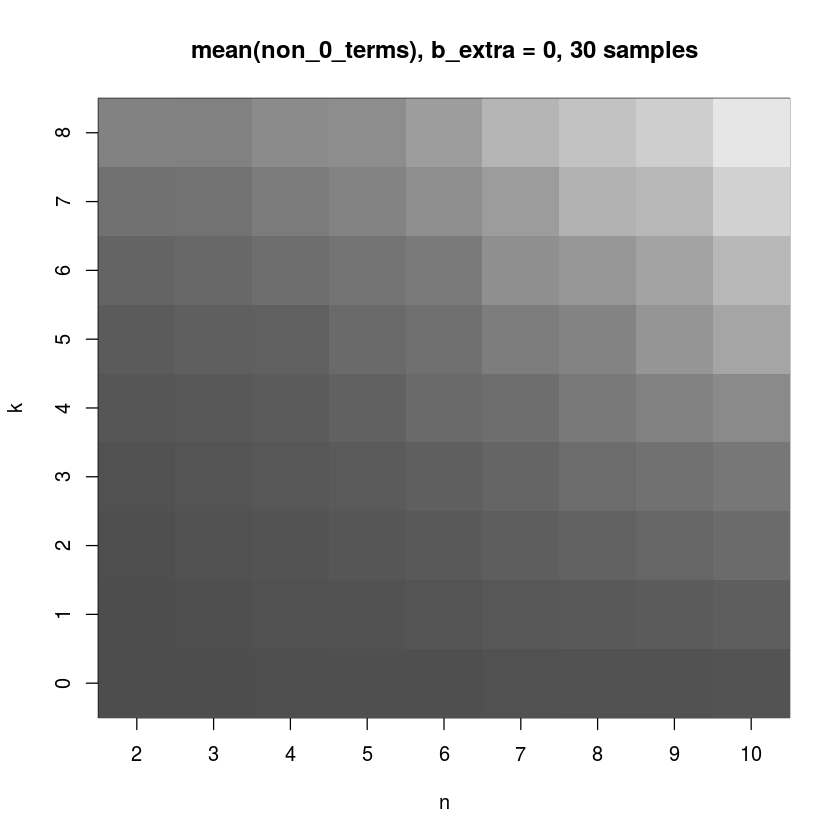

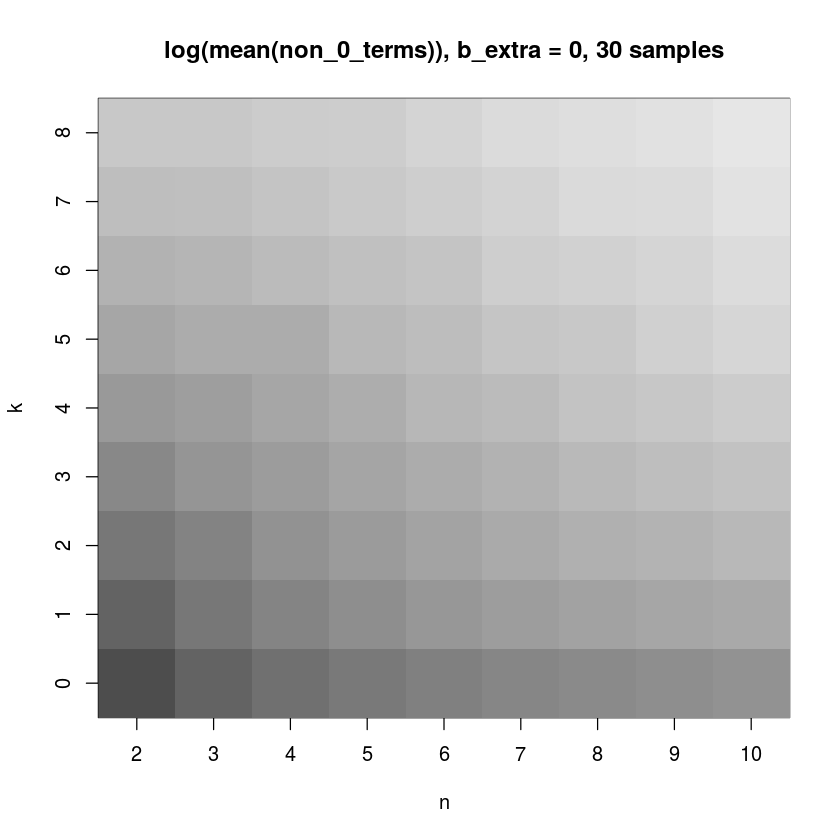

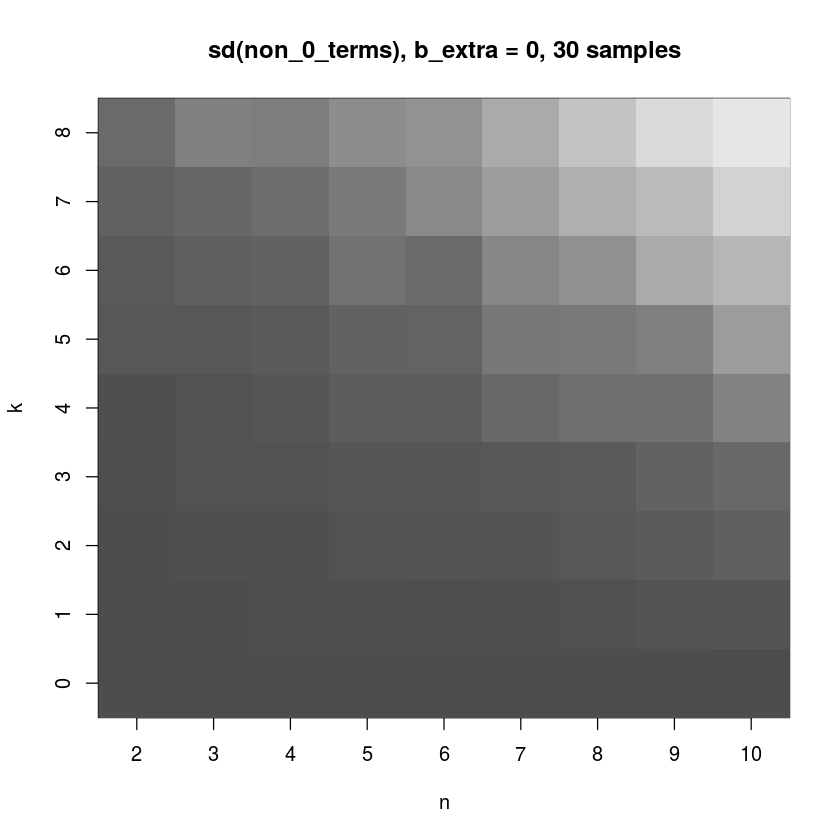

In [130]:
image(means_0,
      col = grey.colors(256),
      x = 2:10,
      y = 0:8,
      xlab = 'n',
      ylab = 'k',
      main = 'mean(non_0_terms), b_extra = 0, 30 samples',
      lab= c(9,9,7))
#heatmap(means,Rowv = NA,Colv = NA)

image(log(means_0),
      col = grey.colors(256),
      x = 2:10,
      y = 0:8,
      xlab = 'n',
      ylab = 'k',
      main = 'log(mean(non_0_terms)), b_extra = 0, 30 samples',
      lab= c(9,9,7))


image(sds_0,
      col = grey.colors(256),
      x = 2:10,
      y = 0:8,
      xlab = 'n',
      ylab = 'k',
      main = 'sd(non_0_terms), b_extra = 0, 30 samples',
      lab= c(9,9,7))

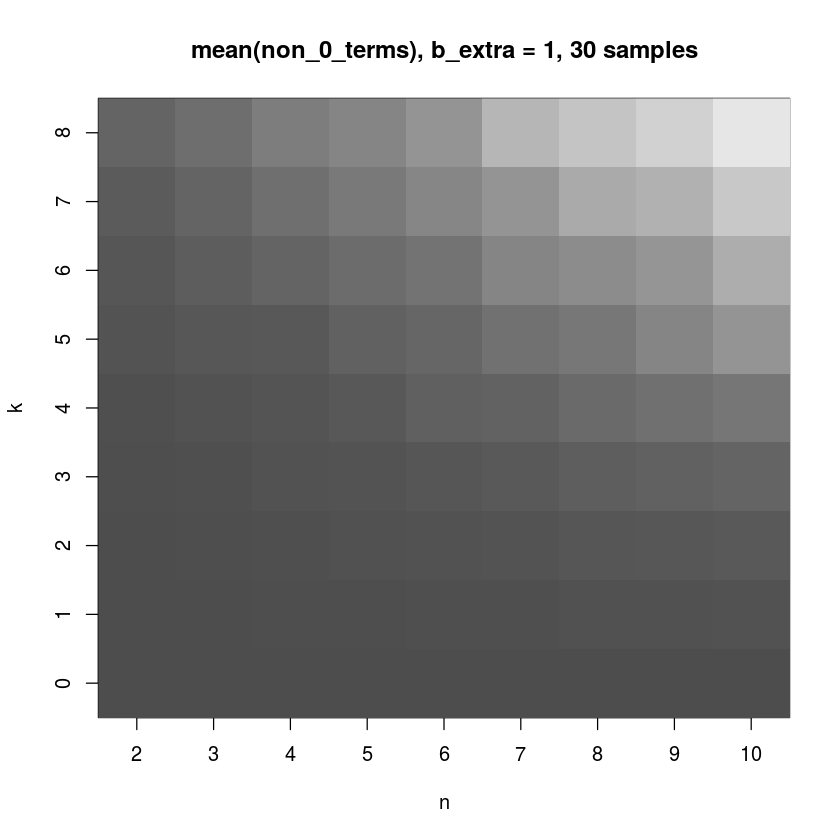

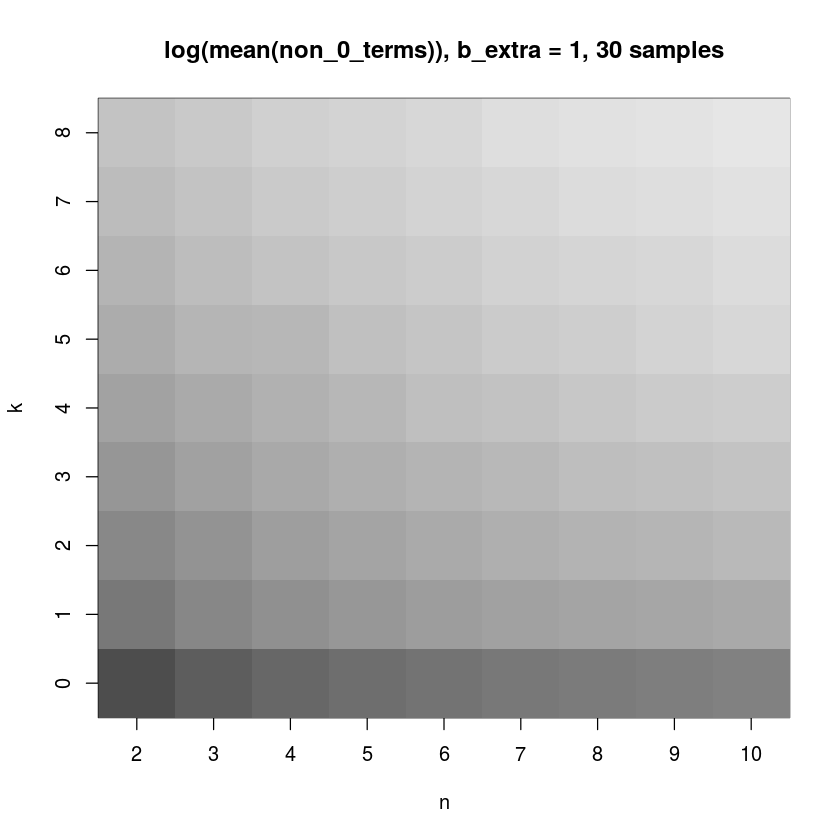

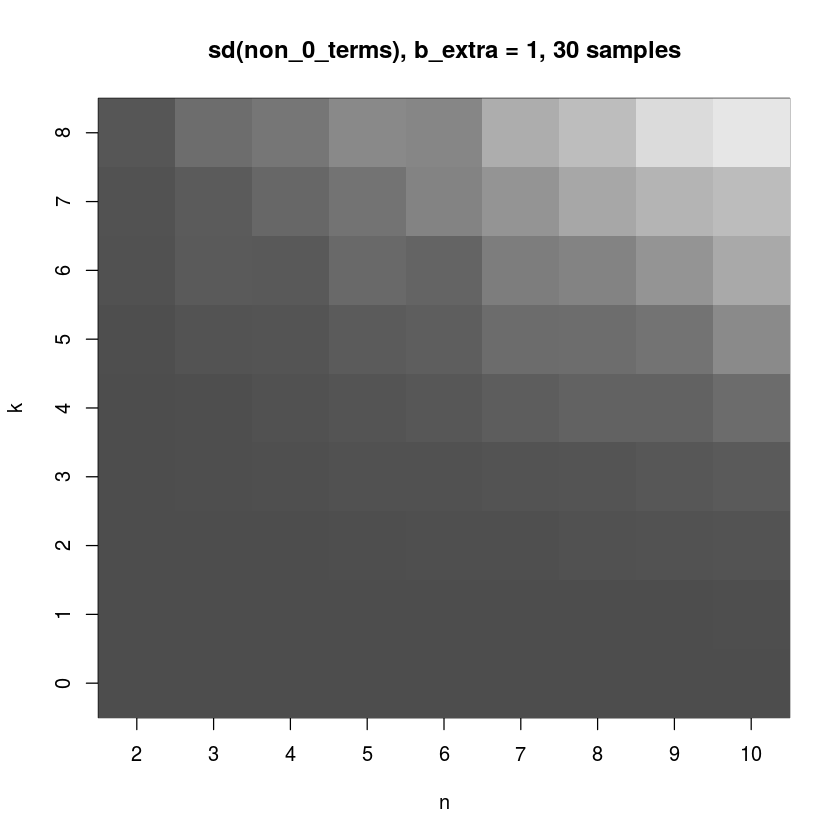

In [131]:
image(means_1,
      col = grey.colors(256),
      x = 2:10,
      y = 0:8,
      xlab = 'n',
      ylab = 'k',
      main = 'mean(non_0_terms), b_extra = 1, 30 samples',
      lab= c(9,9,7))
#heatmap(means,Rowv = NA,Colv = NA)

image(log(means_1),
      col = grey.colors(256),
      x = 2:10,
      y = 0:8,
      xlab = 'n',
      ylab = 'k',
      main = 'log(mean(non_0_terms)), b_extra = 1, 30 samples',
      lab= c(9,9,7))


image(sds_1,
      col = grey.colors(256),
      x = 2:10,
      y = 0:8,
      xlab = 'n',
      ylab = 'k',
      main = 'sd(non_0_terms), b_extra = 1, 30 samples',
      lab= c(9,9,7))